In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 30)

In [6]:
df = pd.read_excel("Telecom.xlsx")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# dataset duplicate value count
df.duplicated().sum()

0

In [10]:
# Missing value/Null value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

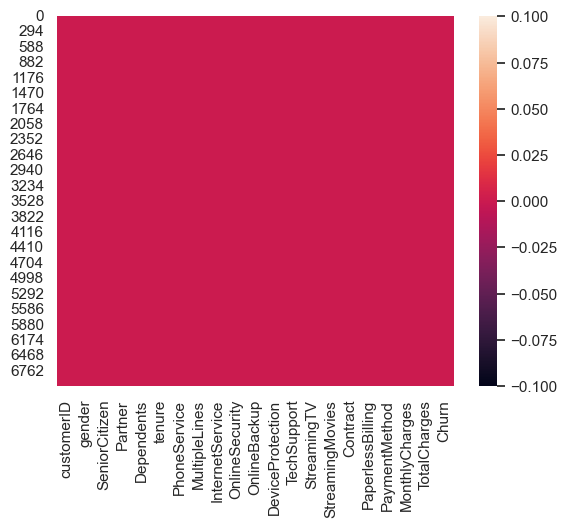

In [11]:
sns.heatmap(df.isnull())
plt.show()

In [12]:
# Understanding dataset variables
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
# describe
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [15]:
# datatype
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
df.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [19]:
for i in df.columns:
    print("******************************************",i,
         "***********************************************")
    print()
    print(set(df[i].tolist()))
    print()

****************************************** customerID ***********************************************

{'4361-FEBGN', '9553-DLCLU', '9114-DPSIA', '2159-TURXX', '1328-EUZHC', '5356-CSVSQ', '7242-QZLXF', '5372-FBKBN', '3472-OAOOR', '4817-VYYWS', '1095-WGNGG', '7613-LLQFO', '3726-TBHQT', '6668-CNMFP', '1131-ALZWV', '1041-RXHRA', '0607-DAAHE', '7531-GQHME', '4801-JZAZL', '7077-XJMET', '1534-OULXE', '4505-EXZHB', '6754-WKSHP', '3146-JTQHR', '6569-KTMDU', '9842-EFSYY', '2528-HFYZX', '0549-CYCQN', '7601-WFVZV', '4092-OFQZS', '7164-BPTUT', '9297-FVVDH', '7375-WMVMT', '2027-FECZV', '7503-EPSZW', '4847-TAJYI', '6244-BESBM', '0533-UCAAU', '3174-AKMAS', '6910-HADCM', '2351-BKRZW', '1488-SYSFC', '9408-HRXRK', '7030-FZTFM', '7881-INRLC', '7356-AYNJP', '8144-DGHXP', '5044-LRQAQ', '7619-PLRLP', '3665-JATSN', '9767-FFLEM', '9659-QEQSY', '9734-UYXQI', '8194-PEEBY', '4819-HJPIW', '5318-YKDPV', '4163-HFTUK', '2900-PHPLN', '1343-EHPYB', '0117-LFRMW', '5154-VEKBL', '9489-UTFKA', '7571-YXDAD', '0064-SUDOG', 

In [20]:
# converting total charges object to numberical datatype
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)

In [21]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [24]:
df.isnull().sum()/len(df)*100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

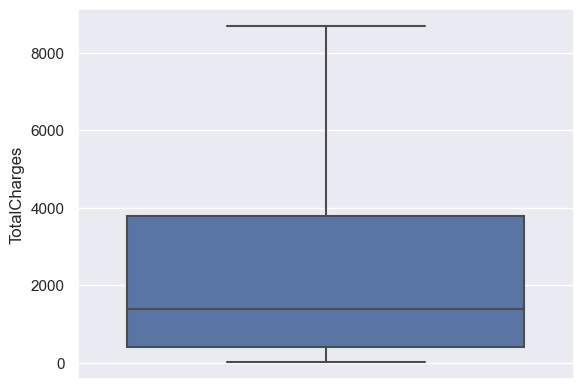

In [25]:
sns.boxplot(y='TotalCharges', data=df)
plt.show()

In [27]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
# you can also try knn imputation method
"""
from sklearn.impute import KNNImputer #SimpleImputer
imputer = KNNImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(df["variable name"]), columns=df.columns)
df_imputed.isnull().sum()
"""

'\nfrom sklearn.impute import KNNImputer #SimpleImputer\nimputer = KNNImputer()\ndf_imputed = pd.DataFrame(imputer.fit_transform(df["variable name"]), columns=df.columns)\ndf_imputed.isnull().sum()\n'

In [28]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [30]:
# Check unique values for each variables
for i in df.columns:
    print("No. of unique values in ", i, "is", df[i].nunique())

No. of unique values in  customerID is 7043
No. of unique values in  gender is 2
No. of unique values in  SeniorCitizen is 2
No. of unique values in  Partner is 2
No. of unique values in  Dependents is 2
No. of unique values in  tenure is 73
No. of unique values in  PhoneService is 2
No. of unique values in  MultipleLines is 3
No. of unique values in  InternetService is 3
No. of unique values in  OnlineSecurity is 3
No. of unique values in  OnlineBackup is 3
No. of unique values in  DeviceProtection is 3
No. of unique values in  TechSupport is 3
No. of unique values in  StreamingTV is 3
No. of unique values in  StreamingMovies is 3
No. of unique values in  Contract is 3
No. of unique values in  PaperlessBilling is 2
No. of unique values in  PaymentMethod is 4
No. of unique values in  MonthlyCharges is 1585
No. of unique values in  TotalCharges is 6531
No. of unique values in  Churn is 2


In [31]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
# Data Wrangling 

print("No. of customer churning :", df[df['Churn']=='Yes'].Churn.count())
churn_df = df[df['Churn']=='Yes']
print("No of unique MultipleLines :", df['MultipleLines'].nunique())
print("No of customer with InternetService :", df[df['InternetService']=='DSL']['InternetService'].count())

print("No. of customer with PhoneService :", df[df['PhoneService']=='Yes']['PhoneService'].count())
churn_df

No. of customer churning : 1869
No of unique MultipleLines : 3
No of customer with InternetService : 2421
No. of customer with PhoneService : 6361


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [38]:
# % of total customer churning
print("Total no. of customer :", df.Churn.count())
perc_churn = (len(churn_df)/len(df))*100
print(f"percentage of customer churning :{round(perc_churn, 2)}%")

Total no. of customer : 7043
percentage of customer churning :26.54%
